<a href="https://colab.research.google.com/github/JohnMartiiinnnn/Water-Quality/blob/main/CPEN_106_Activity_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procedure

This contains Step 1 to Step 6 for the data analysis of data gathered from BFAR and PHIVOLCS.

## Step 1: Data Collection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load CSV files
bfar_df = pd.read_csv('/content/drive/MyDrive/CPEN 106 - Activity 2 Data Sets/CPEN106_TAAL VOLCANO_Sulfur Dioxide Flux_2020-2025 - BFAR.csv')
phivolcs_df = pd.read_csv('/content/drive/MyDrive/CPEN 106 - Activity 2 Data Sets/CPEN106_TAAL VOLCANO_Sulfur Dioxide Flux_2020-2025 - PHIVOLCS PARAMETERS.csv')

# Preview the data
print("BFAR Dataset:")
print(bfar_df.head())

print("\nPHIVOLCS Dataset:")
print(phivolcs_df.head())

print("BFAR columns:", bfar_df.columns.tolist())
print("PHIVOLCS columns:", phivolcs_df.columns.tolist())

BFAR Dataset:
   Year     Month      Site  Surface Temperature Middle Temperature  \
0  2013   January   TANAUAN                26.28              26.28   
1  2013   January   TALISAY                26.35              26.35   
2  2013  February       AYA                26.53              26.53   
3  2013  February   TUMAWAY                26.55              26.55   
4  2013  February  SAMPALOC                26.98              26.98   

   Bottom Temperature    pH  Ammonia  Nitrate  Phosphate Dissolved Oxygen  \
0               26.28  8.52     0.83      NaN        NaN             0.98   
1               26.35  8.63     0.00      NaN        NaN             5.66   
2               26.53  8.62     0.56      NaN        NaN             4.44   
3               26.55  8.64     0.53      NaN        NaN              5.8   
4               26.98  8.77     0.53      NaN        NaN             6.51   

  Sulfide Carbon Dioxide Weather Condition Wind Direction Air Temperature  
0     NaN           

In [ ]:
print("\nBFAR Summary Statistics:")
print(bfar_df.describe())

print("\nPHIVOLCS Summary Statistics:")
print(phivolcs_df.describe())


BFAR Summary Statistics:
              Year  Surface Temperature  Bottom Temperature           pH  \
count  1279.000000          1258.000000         1187.000000  1276.000000   
mean   2017.516810            29.445079           27.442047     8.050361   
std       3.116591             1.798449            1.240899     0.752819   
min    2013.000000            24.300000           24.900000     5.150000   
25%    2015.000000            28.100000           26.800000     7.920000   
50%    2017.000000            29.600000           27.200000     8.200000   
75%    2020.000000            30.900000           28.000000     8.500000   
max    2023.000000            37.000000           33.000000     9.250000   

           Ammonia     Nitrate   Phosphate  
count  1179.000000  322.000000  533.000000  
mean      0.294436    0.118137    2.363546  
std       0.688197    0.123436    0.430346  
min       0.000000    0.000000    0.000000  
25%       0.150000    0.050000    2.330000  
50%       0.250000 

## Step 2: Data Preprocessing

In [ ]:
# Step 1: Add Year and Month columns to PHIVOLCS to match BFAR
phivolcs_df['Year'] = phivolcs_df['Date'].dt.year
phivolcs_df['Month'] = phivolcs_df['Date'].dt.strftime('%B')  # Full month name like 'January'

# Step 2: Merge on Year and Month
merged_data = pd.merge(bfar_df, phivolcs_df, on=['Year', 'Month'], how='left')

# Step 3: Clean column naming for clarity
merged_data.rename(columns={'Date_x': 'Date'}, inplace=True)

# Step 4: Display merged results before filtering
print("\nMerged Data (First few rows):")
print(merged_data.head())

print("\nMissing values in merged data (before filtering):")
print(merged_data.isnull().sum())

print("\nDuplicate rows in merged data:")
print(merged_data.duplicated().sum())

# Step 5: Filter to only include rows from 2022 onwards (when PHIVOLCS data exists)
merged_data_recent = merged_data[merged_data['Year'] >= 2022].copy()

# Step 6: Display results after filtering
print("\nFiltered Merged Data (2022 onwards, first few rows):")
print(merged_data_recent.head())

print("\nMissing values after filtering:")
print(merged_data_recent.isnull().sum())



Merged Data (First few rows):
   Year     Month      Site  Surface Temperature Middle Temperature  \
0  2013   January   TANAUAN                26.28              26.28   
1  2013   January   TALISAY                26.35              26.35   
2  2013  February       AYA                26.53              26.53   
3  2013  February   TUMAWAY                26.55              26.55   
4  2013  February  SAMPALOC                26.98              26.98   

   Bottom Temperature    pH  Ammonia  Nitrate  Phosphate  ... Wind Direction  \
0               26.28  8.52     0.83      NaN        NaN  ...             NE   
1               26.35  8.63     0.00      NaN        NaN  ...             NE   
2               26.53  8.62     0.56      NaN        NaN  ...             NE   
3               26.55  8.64     0.53      NaN        NaN  ...             NE   
4               26.98  8.77     0.53      NaN        NaN  ...             NE   

  Air Temperature Date Eruption Seismicity Acidity Temperatur

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Copy to preserve original
df = merged_data_recent.copy()

# Step 1: Drop columns with >70% missing values
threshold = 0.7 * len(df)
df = df.dropna(axis=1, thresh=threshold)

# Step 1.2: Fill numeric columns with mean, categorical with mode
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df.loc[:, col] = df[col].fillna(df[col].mean())  # Use .loc to avoid warning
    else:
        df.loc[:, col] = df[col].fillna(df[col].mode()[0])  # Use .loc to avoid warning

# Step 2: Remove duplicate rows
df = df.drop_duplicates()

# Step 3: Convert 'Date' to datetime
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])  # Use .loc to avoid warning

# Step 4: Normalize numeric values
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df.loc[:, numeric_cols] = scaler.fit_transform(df[numeric_cols])  # Use .loc to avoid warning

# Check the results

# 1. Check for missing values
print("Missing values after preprocessing:")
print(df.isnull().sum())

# 2. Check for duplicates
print(f"\nOriginal shape: {merged_data_recent.shape}")
print(f"Filtered shape: {df.shape}")

# 3. Check 'Date' conversion
print(f"\n'Info' on Date column: {df['Date'].dtype}")

# 4. Check normalization (min and max values of numeric columns)
print(f"\nMin values of numeric columns after normalization:")
print(df[numeric_cols].min())

print(f"\nMax values of numeric columns after normalization:")
print(df[numeric_cols].max())

# 5. Sample of data after preprocessing
print("\nSample of the preprocessed data:")
print(df.head())

Missing values after preprocessing:
Year                        0
Month                       0
Site                        0
Surface Temperature         0
Middle Temperature          0
pH                          0
Ammonia                     0
Nitrate                     0
Phosphate                   0
Dissolved Oxygen            0
Weather Condition           0
Wind Direction              0
Air Temperature             0
Date                        0
Seismicity                  0
Acidity                     0
Temperature (in Celsius)    0
SO2                         0
Plume (in meters)           0
Ground Deformation          0
dtype: int64

Original shape: (5990, 24)
Filtered shape: (5990, 20)

'Info' on Date column: datetime64[ns]

Min values of numeric columns after normalization:
Year                        0.0
Surface Temperature         0.0
pH                          0.0
Ammonia                     0.0
Nitrate                     0.0
Phosphate                   0.0
Seismicity   

In [ ]:
# Describe the dataset for numeric columns
print("Descriptive statistics for numeric columns:")
print(df.describe())

# Describe the dataset for non-numeric (categorical) columns
print("\nDescriptive statistics for categorical columns:")
print(df.describe(include=['object']))

# Data types and non-null counts for each column
print("\nData types and non-null counts:")
print(df.info())

# Check for unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Check for the number of missing values
print("\nMissing values count in each column:")
print(df.isnull().sum())


Descriptive statistics for numeric columns:
              Year  Surface Temperature           pH      Ammonia  \
count  5990.000000          5990.000000  5990.000000  5990.000000   
mean      0.487479             0.473239     0.507656     0.019525   
min       0.000000             0.000000     0.000000     0.000000   
25%       0.000000             0.283582     0.115789     0.005687   
50%       0.000000             0.473239     0.723684     0.016185   
75%       1.000000             0.671642     0.789474     0.020560   
max       1.000000             1.000000     1.000000     1.000000   
std       0.499885             0.257743     0.342437     0.068140   

           Nitrate    Phosphate                           Date   Seismicity  \
count  5990.000000  5990.000000                           5990  5990.000000   
mean      0.085866     0.586985  2022-12-26 14:20:52.487479040     0.050908   
min       0.000000     0.000000            2022-01-01 00:00:00     0.000000   
25%       0.057971

## Step 3: Exploratory Data Analysis (EDA)

Summary Statistics:
              Year  Surface Temperature           pH      Ammonia  \
count  5990.000000          5990.000000  5990.000000  5990.000000   
mean      0.487479             0.473239     0.507656     0.019525   
min       0.000000             0.000000     0.000000     0.000000   
25%       0.000000             0.283582     0.115789     0.005687   
50%       0.000000             0.473239     0.723684     0.016185   
75%       1.000000             0.671642     0.789474     0.020560   
max       1.000000             1.000000     1.000000     1.000000   
std       0.499885             0.257743     0.342437     0.068140   

           Nitrate    Phosphate                           Date   Seismicity  \
count  5990.000000  5990.000000                           5990  5990.000000   
mean      0.085866     0.586985  2022-12-26 14:20:52.487479040     0.050908   
min       0.000000     0.000000            2022-01-01 00:00:00     0.000000   
25%       0.057971     0.477089           

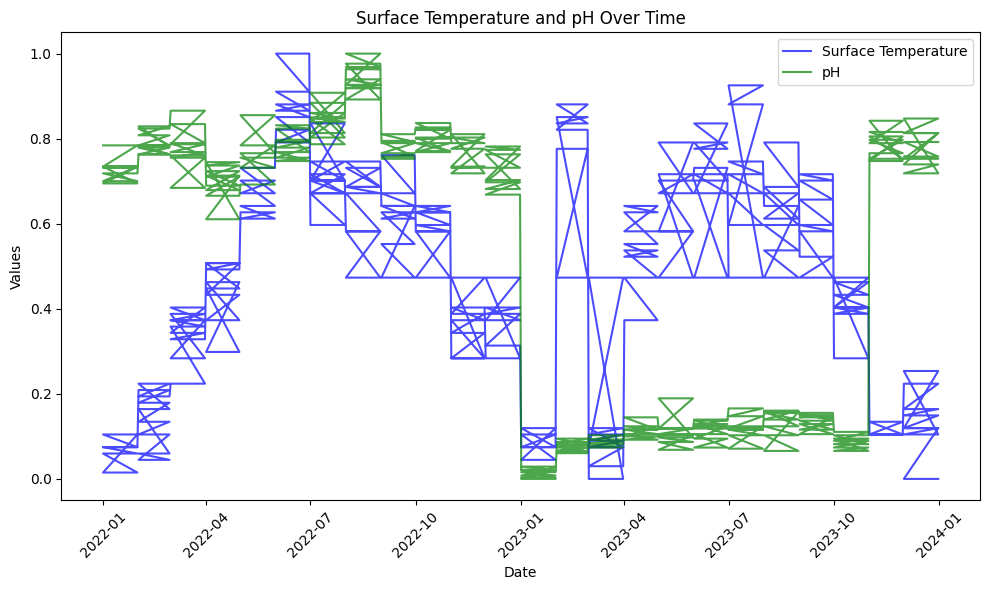

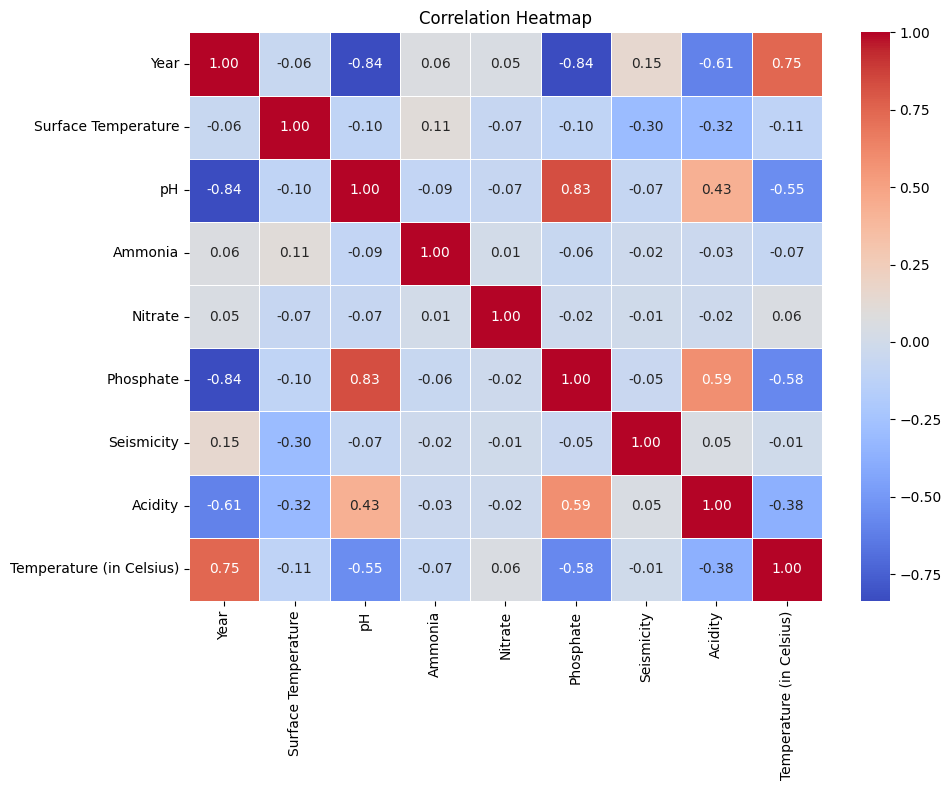

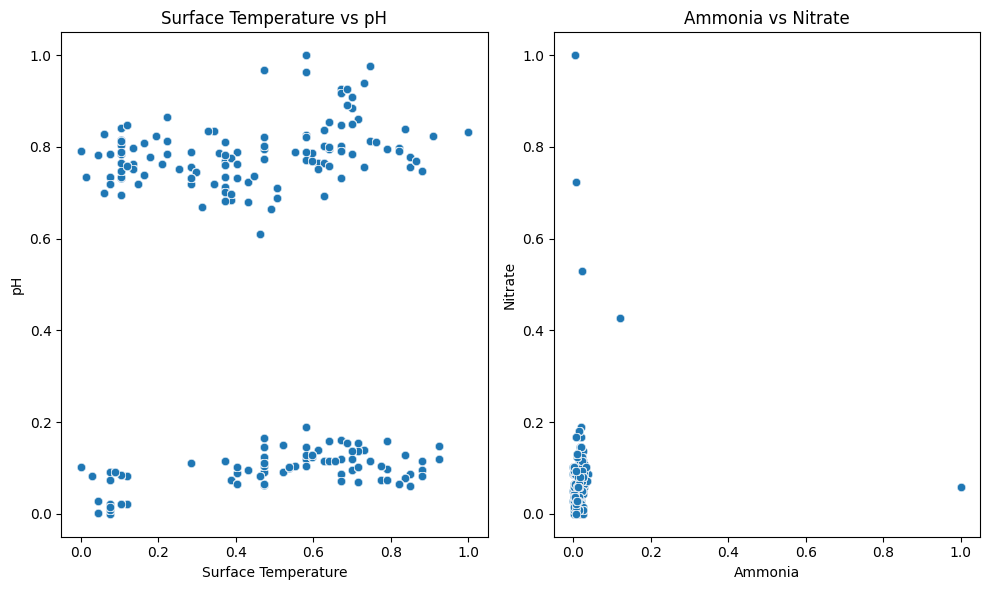

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate summary statistics
print("Summary Statistics:")
print(df.describe())

# Step 2: Compute the correlation matrix for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Step 3: Visualize trends

# 3.1 Line charts for time-series data (e.g., Surface Temperature and pH over time)
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Surface Temperature'], label='Surface Temperature', color='b', alpha=0.7)
plt.plot(df['Date'], df['pH'], label='pH', color='g', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Surface Temperature and pH Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.2 Heatmap for feature correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 3.3 Scatter plots for parameter relationships (e.g., Surface Temperature vs pH, and Ammonia vs Nitrate)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Surface Temperature', y='pH', alpha=0.7)
plt.title('Surface Temperature vs pH')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Ammonia', y='Nitrate', alpha=0.7)
plt.title('Ammonia vs Nitrate')

plt.tight_layout()
plt.show()


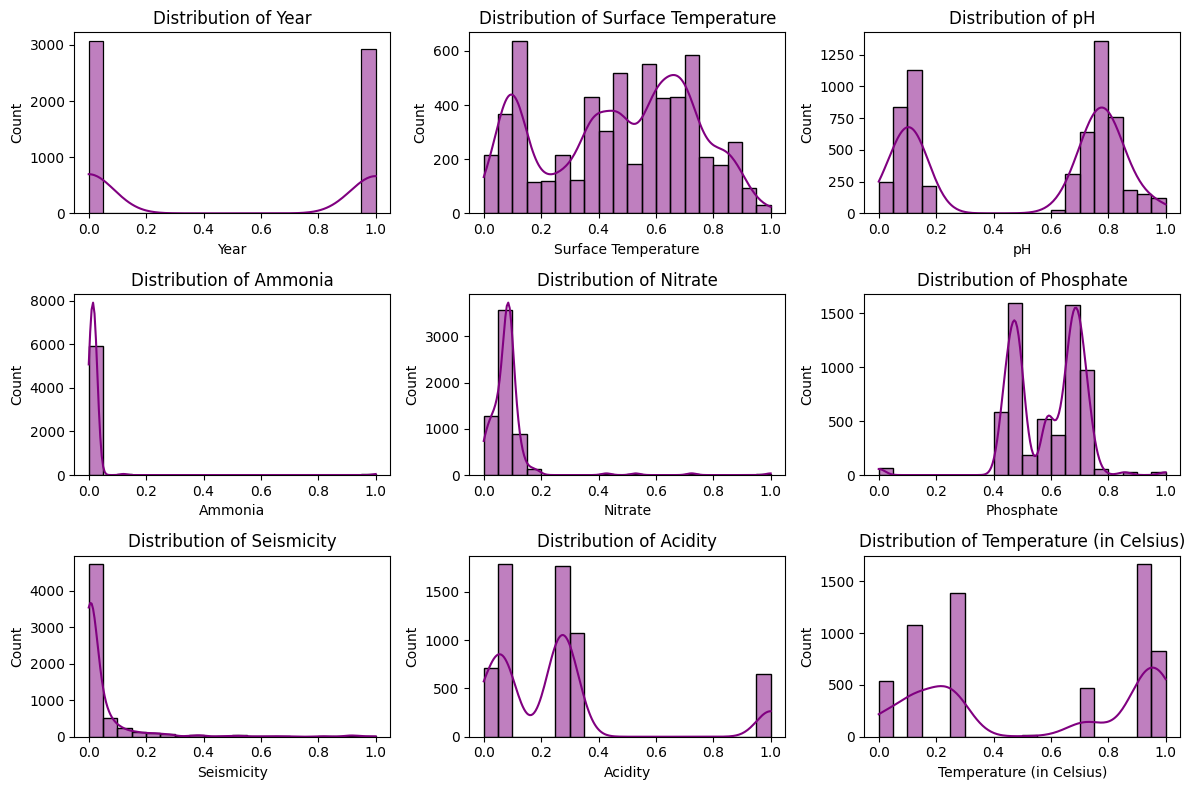

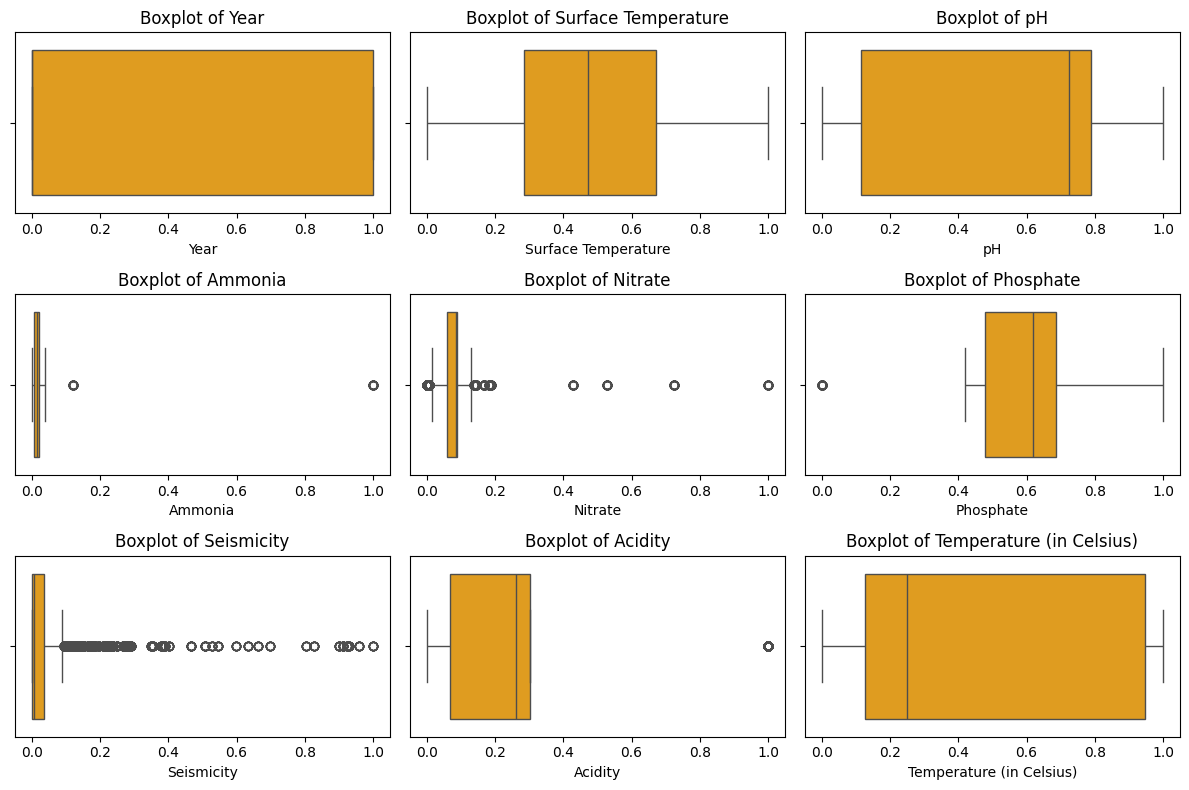

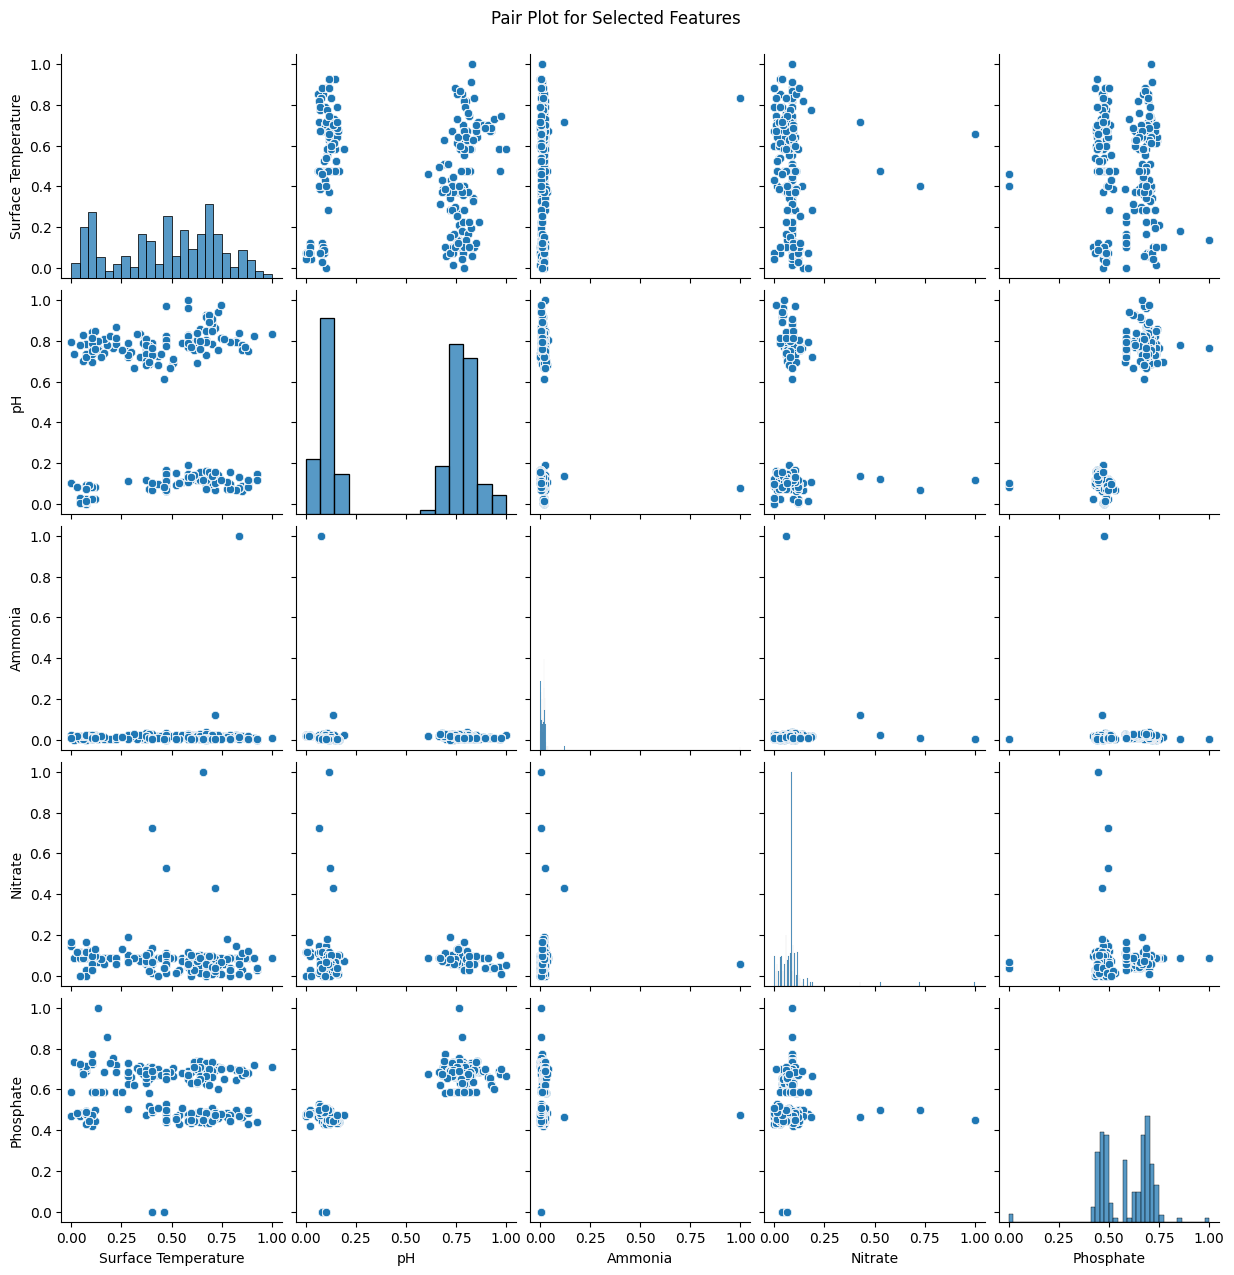

<ipython-input-172-ddcc3ad477e4>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='coolwarm')


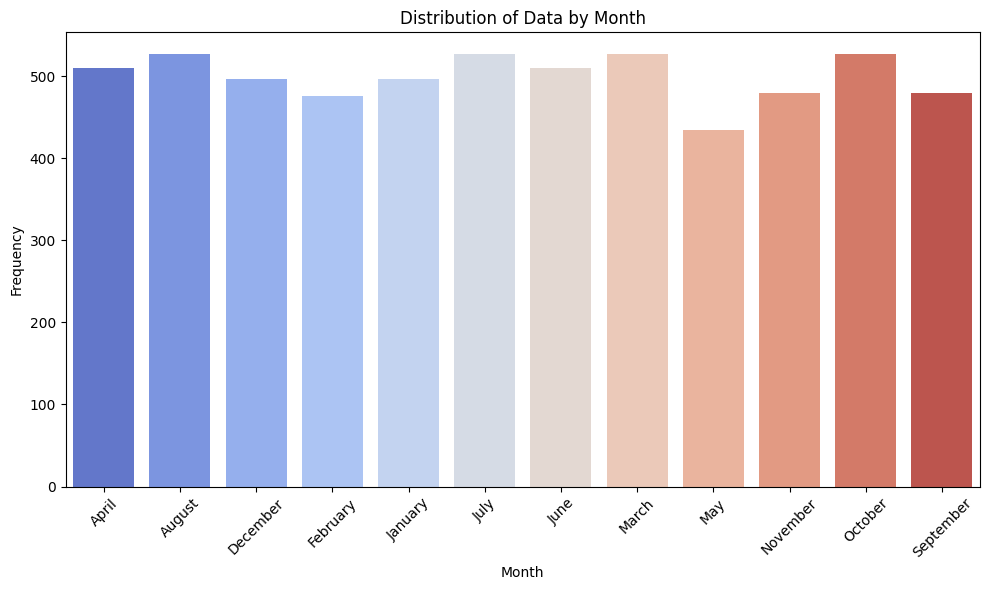

<ipython-input-172-ddcc3ad477e4>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weather Condition', palette='Set2')


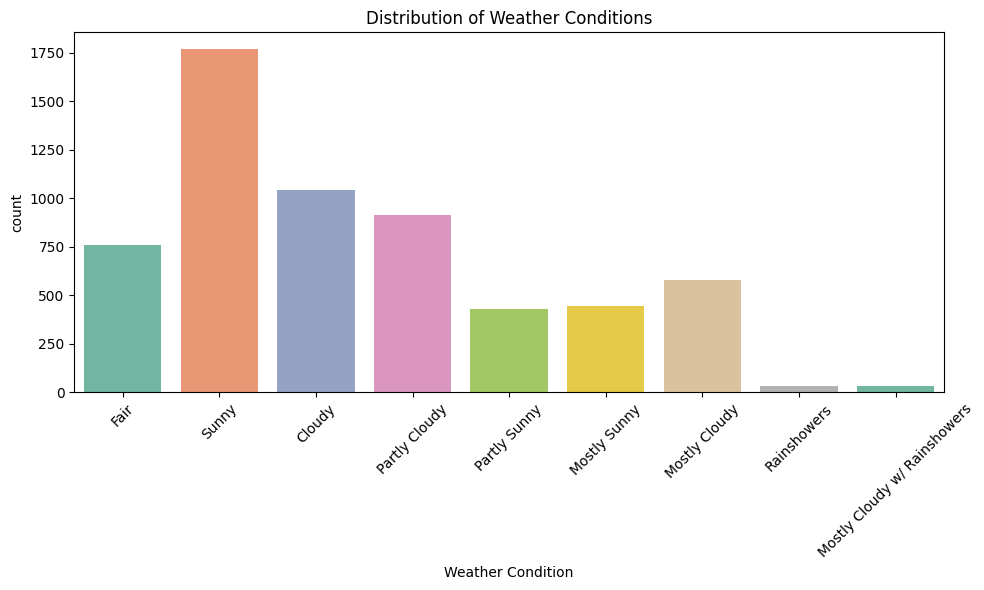

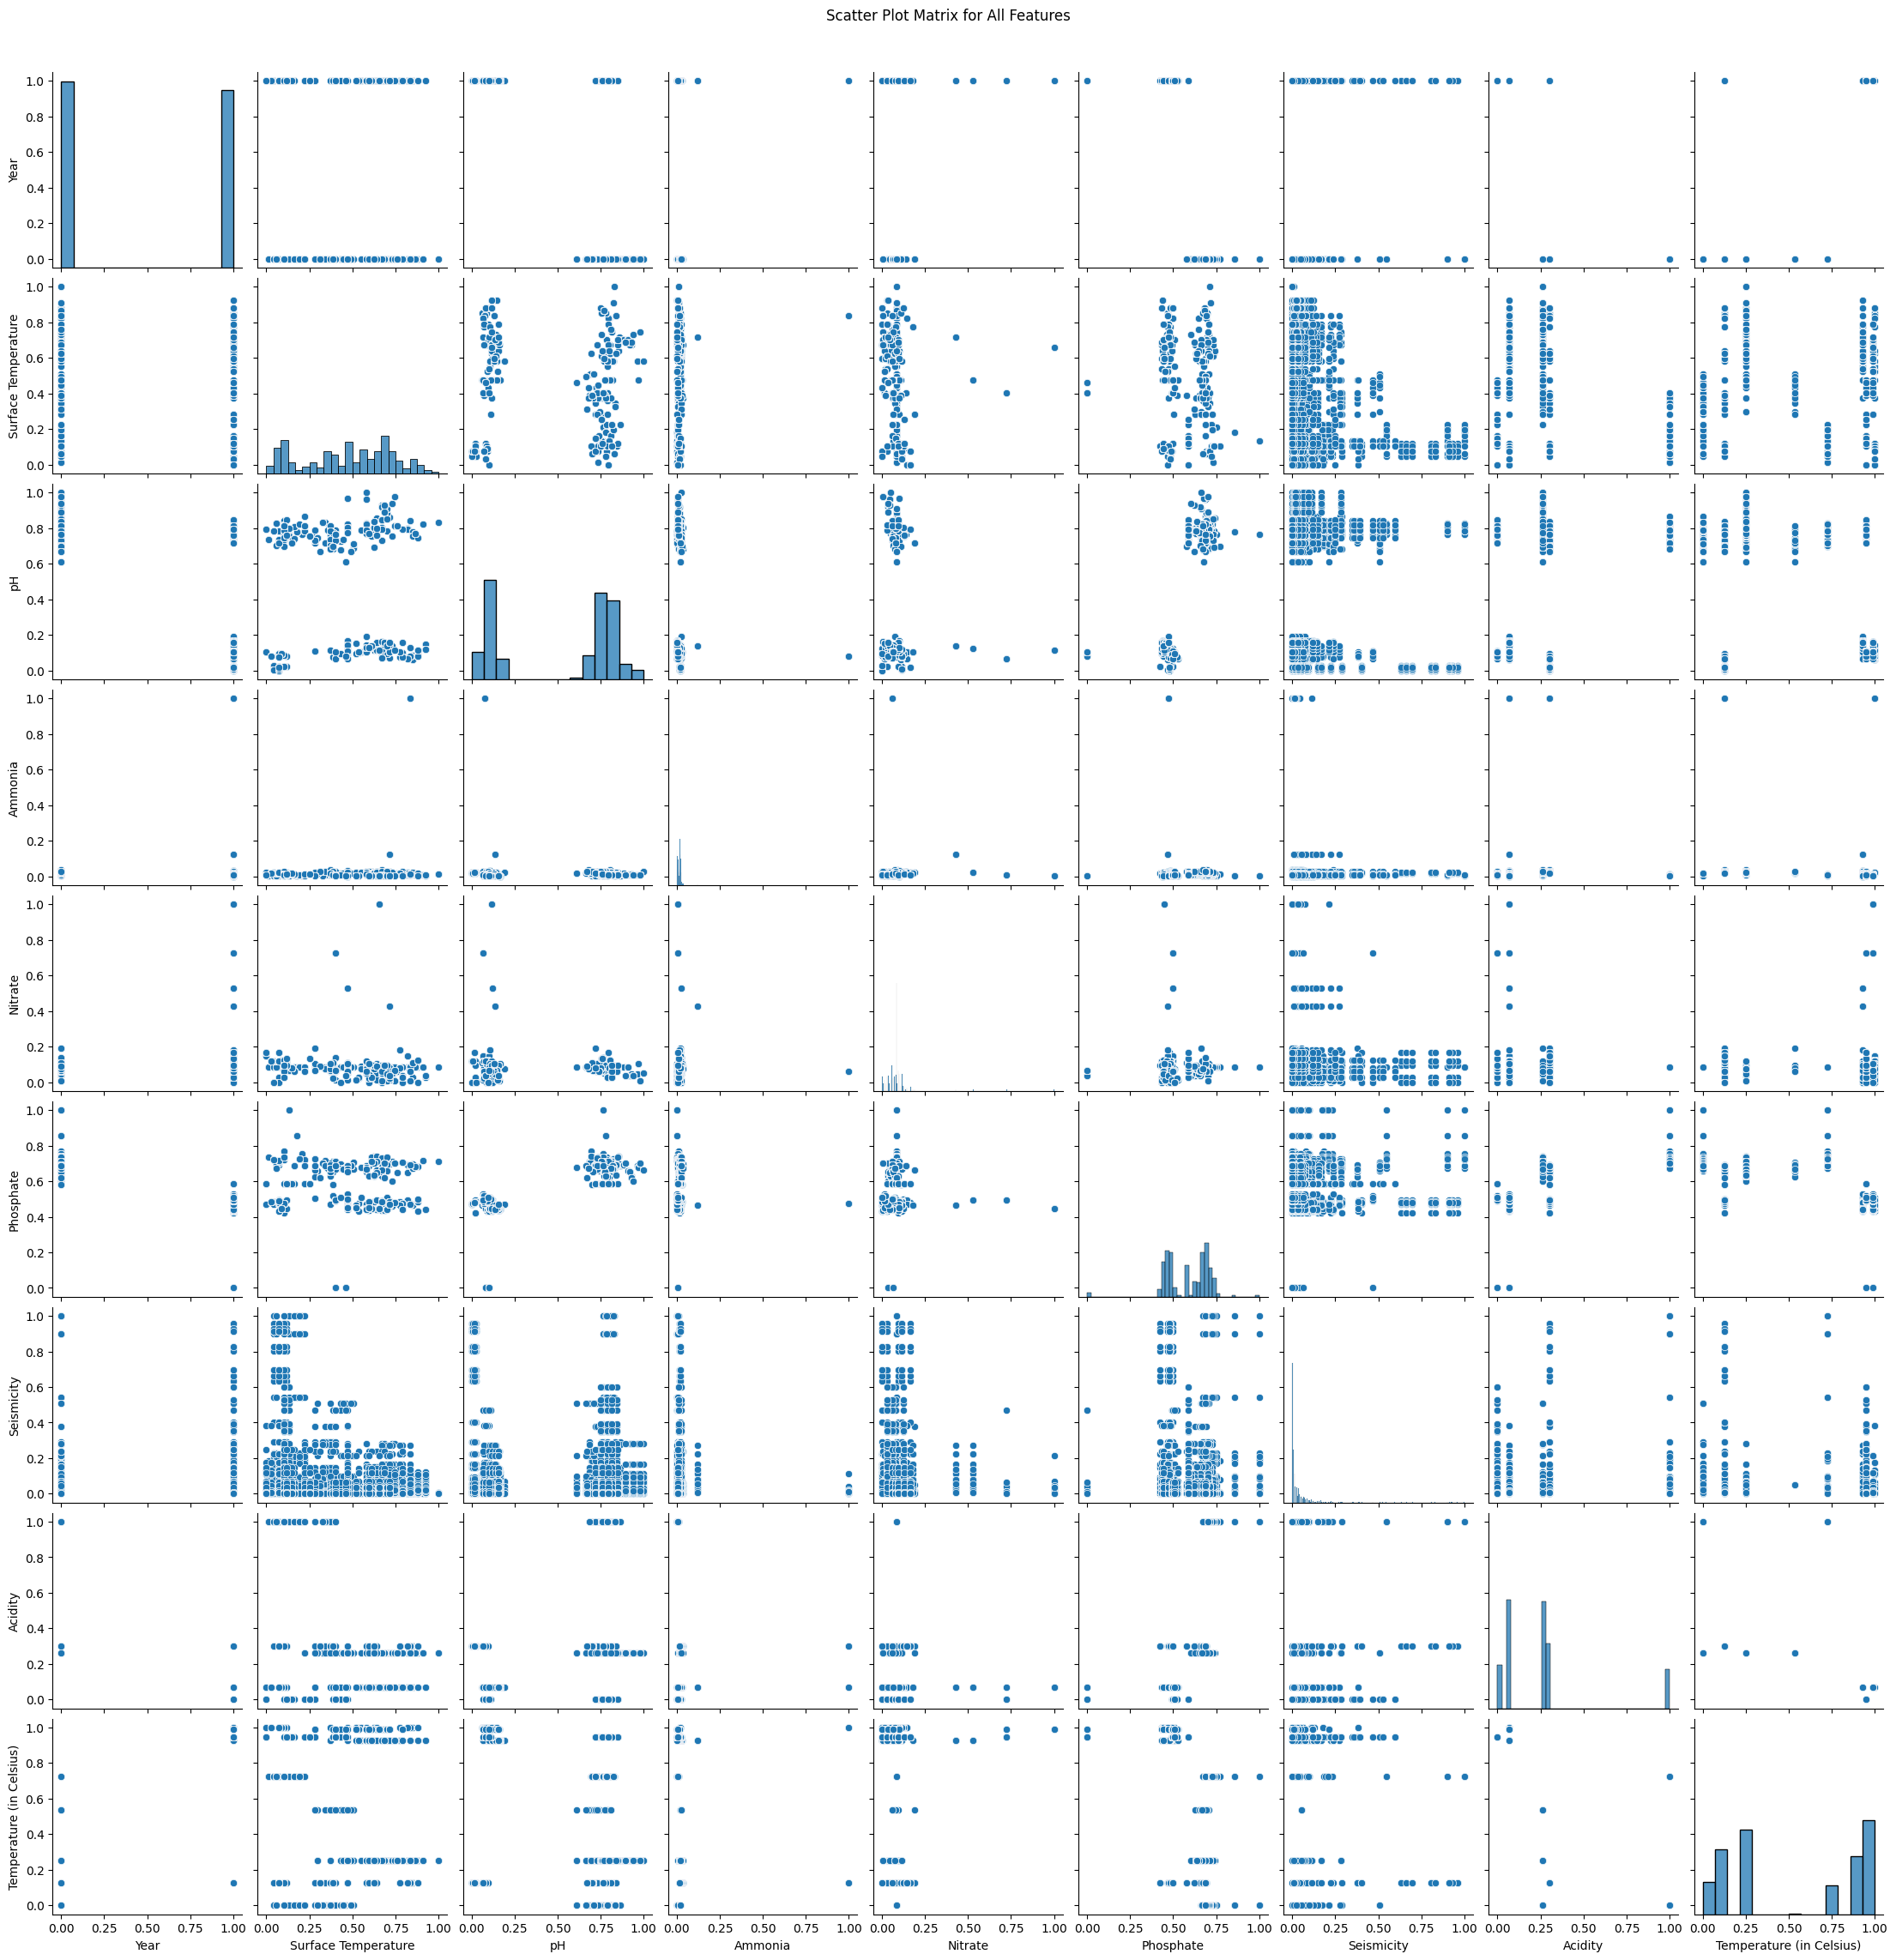

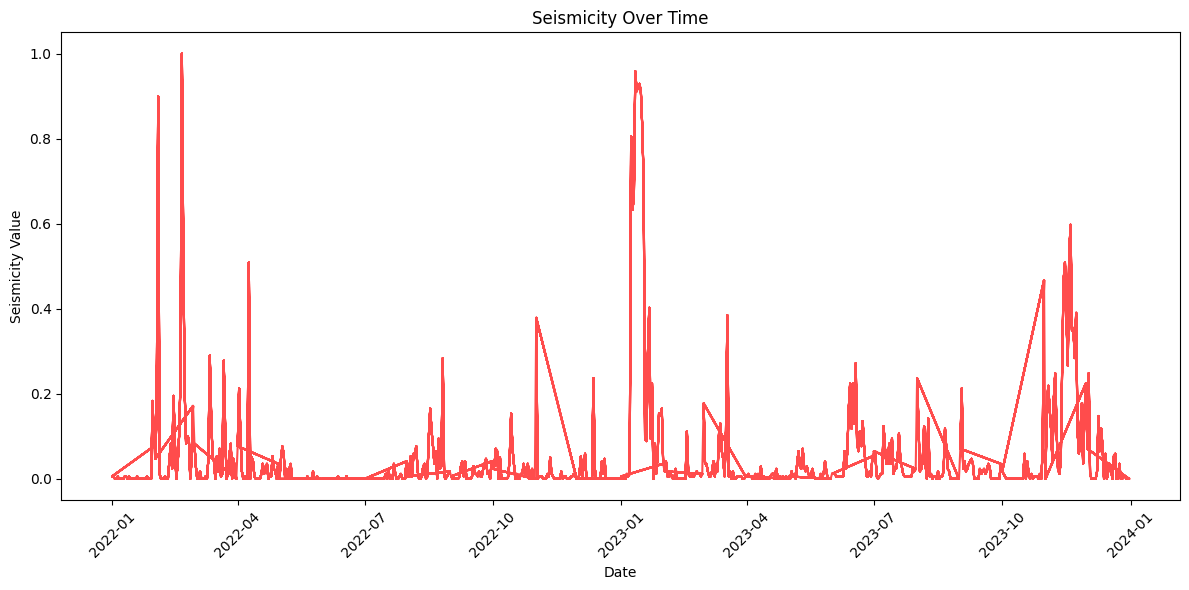

In [ ]:
# 1. Histogram for Distribution of Numeric Features
plt.figure(figsize=(12, 8))
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, color='purple', bins=20)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

# 2. Boxplot for Outlier Detection in Numeric Features
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=column, color='orange')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
plt.show()

# 3. Pair Plot for Feature Relationships (Subset of Features)
sns.pairplot(df[['Surface Temperature', 'pH', 'Ammonia', 'Nitrate', 'Phosphate']])
plt.suptitle("Pair Plot for Selected Features", y=1.02)
plt.show()

# 4. Bar Plot for Categorical Data (e.g., Month and Weather Condition)
plt.figure(figsize=(10, 6))
month_counts = df['Month'].value_counts().sort_index()
sns.barplot(x=month_counts.index, y=month_counts.values, palette='coolwarm')
plt.title('Distribution of Data by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Count Plot for Categorical Data (e.g., Weather Condition)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather Condition', palette='Set2')
plt.title('Distribution of Weather Conditions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Scatter Plot Matrix for All Features (Optional: Use subset if data is too large)
sns.pairplot(df)
plt.suptitle('Scatter Plot Matrix for All Features', y=1.02)
plt.show()

# 8. Line Chart of Seismicity over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Seismicity'], label='Seismicity', color='red', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Seismicity Value')
plt.title('Seismicity Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 4: Predictive Modeling using Ensemble Learning

In [ ]:
# Step 1: Prepare data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Select the target variable (e.g., 'pH')
target_variable = 'pH'

# Step 2: Select features and prepare data
features = ['Temperature (in Celsius)', 'Surface Temperature', 'Ammonia', 'Nitrate', 'Phosphate', 'Acidity', 'Seismicity']
X = df[features]
y = df[target_variable]

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Define models

# 3a. CNN Model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
    model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 3b. LSTM Model
def create_lstm_model():
    model = models.Sequential()
    model.add(layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
    model.add(layers.LSTM(64, activation='relu', return_sequences=False))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 3c. Hybrid CNN-LSTM Model
def create_cnn_lstm_model():
    model = models.Sequential()
    model.add(layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
    model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.LSTM(64, activation='relu', return_sequences=False))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 4: Train models and evaluate

# Initialize models
cnn_model = create_cnn_model()
lstm_model = create_lstm_model()
cnn_lstm_model = create_cnn_lstm_model()

# Train CNN Model
cnn_history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Train LSTM Model
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Train CNN-LSTM Model
cnn_lstm_history = cnn_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Step 5: Evaluate models using MAE and RMSE
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse

# Evaluate CNN Model
cnn_mae, cnn_rmse = evaluate_model(cnn_model, X_test, y_test)
print(f"CNN Model - MAE: {cnn_mae:.4f}, RMSE: {cnn_rmse:.4f}")

# Evaluate LSTM Model
lstm_mae, lstm_rmse = evaluate_model(lstm_model, X_test, y_test)
print(f"LSTM Model - MAE: {lstm_mae:.4f}, RMSE: {lstm_rmse:.4f}")

# Evaluate Hybrid CNN-LSTM Model
cnn_lstm_mae, cnn_lstm_rmse = evaluate_model(cnn_lstm_model, X_test, y_test)
print(f"Hybrid CNN-LSTM Model - MAE: {cnn_lstm_mae:.4f}, RMSE: {cnn_lstm_rmse:.4f}")

<ipython-input-187-f9da21b8eb6a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
CNN Model - MAE: 0.0411, RMSE: 0.0591
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
LSTM Model - MAE: 0.0392, RMSE: 0.0504
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Hybrid CNN-LSTM Model - MAE: 0.0321, RMSE: 0.0448


In [ ]:
def calculate_wqi(df):
    # Convert all columns to numeric, coercing errors to NaN
    df = df.apply(pd.to_numeric, errors='coerce')

    # Assume we have weights and standards for each parameter (you can customize this)
    wqi_params = {
        'pH': {'weight': 0.17, 'standard': (6.5, 8.5)},  # pH standard range
        'Dissolved Oxygen': {'weight': 0.18, 'standard': (5, 7)},  # Dissolved Oxygen standard range
        'Ammonia': {'weight': 0.15, 'standard': (0, 0.05)},  # Ammonia standard range
        'Nitrate': {'weight': 0.12, 'standard': (0, 0.1)},  # Nitrate standard range
        'Air Temperature': {'weight': 0.10, 'standard': (15, 25)},  # Air Temperature standard range
        'Acidity': {'weight': 0.08, 'standard': (0, 0.3)},  # Acidity standard range
        'Seismicity': {'weight': 0.05, 'standard': (0, 1)}  # Seismicity (can be related to volcanic influence)
    }

    wqi = 0
    for param, values in wqi_params.items():
        # Check if the parameter exists in the dataframe
        if param in df.columns:
            # Calculate normalized value (min-max scaling within standard range)
            min_val, max_val = values['standard']
            actual_value = df[param].mean()  # use predicted values here
            normalized_value = (actual_value - min_val) / (max_val - min_val)

            # Calculate the weighted value
            wqi += normalized_value * values['weight']

    return wqi

# Apply the WQI calculation
wqi_value = calculate_wqi(df)
print(f"Calculated WQI: {wqi_value}")


Calculated WQI: -0.20520849896084847


<ipython-input-175-276dfb352b32>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
CNN Model - MAE: 0.0479, RMSE: 0.0633
LSTM Model - MAE: 0.0408, RMSE: 0.0543
Hybrid CNN-LSTM Model - MAE: 0.0306, RMSE: 0.0413


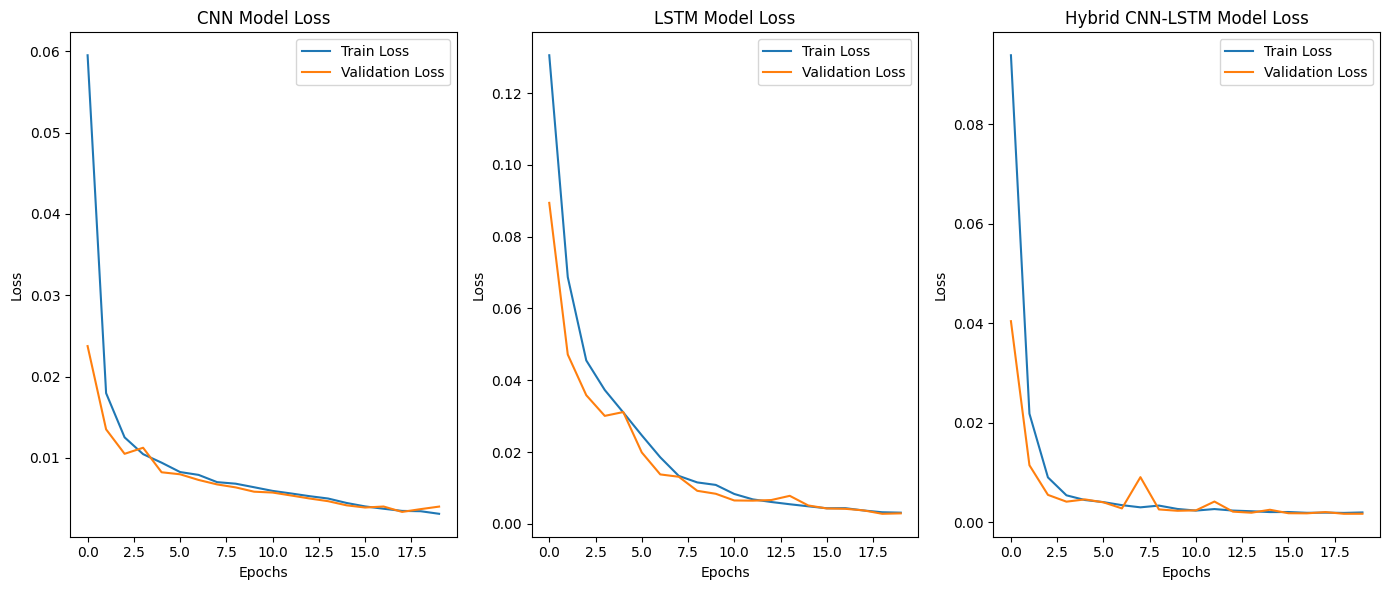

In [ ]:
# Step 1: Prepare Data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Target variable (e.g., 'pH')
target_variable = 'pH'

# Select features
features = ['Temperature (in Celsius)', 'Surface Temperature', 'Ammonia', 'Nitrate', 'Phosphate', 'Acidity', 'Seismicity']
X = df[features]
y = df[target_variable]

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Define Models
# CNN Model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
    model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# LSTM Model
def create_lstm_model():
    model = models.Sequential()
    model.add(layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
    model.add(layers.LSTM(64, activation='relu', return_sequences=False))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Hybrid CNN-LSTM Model
def create_cnn_lstm_model():
    model = models.Sequential()
    model.add(layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
    model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.LSTM(64, activation='relu', return_sequences=False))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 3: Train Models
cnn_model = create_cnn_model()
lstm_model = create_lstm_model()
cnn_lstm_model = create_cnn_lstm_model()

# Train CNN Model
cnn_history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Train LSTM Model
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Train Hybrid CNN-LSTM Model
cnn_lstm_history = cnn_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Step 4: Evaluate Models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse

# Evaluate CNN Model
cnn_mae, cnn_rmse = evaluate_model(cnn_model, X_test, y_test)

# Evaluate LSTM Model
lstm_mae, lstm_rmse = evaluate_model(lstm_model, X_test, y_test)

# Evaluate Hybrid CNN-LSTM Model
cnn_lstm_mae, cnn_lstm_rmse = evaluate_model(cnn_lstm_model, X_test, y_test)

# Output MAE and RMSE results
print(f"CNN Model - MAE: {cnn_mae:.4f}, RMSE: {cnn_rmse:.4f}")
print(f"LSTM Model - MAE: {lstm_mae:.4f}, RMSE: {lstm_rmse:.4f}")
print(f"Hybrid CNN-LSTM Model - MAE: {cnn_lstm_mae:.4f}, RMSE: {cnn_lstm_rmse:.4f}")

# Step 5: Visualize Loss during Training
plt.figure(figsize=(14, 6))

# CNN Model Loss
plt.subplot(1, 3, 1)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# LSTM Model Loss
plt.subplot(1, 3, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Hybrid CNN-LSTM Model Loss
plt.subplot(1, 3, 3)
plt.plot(cnn_lstm_history.history['loss'], label='Train Loss')
plt.plot(cnn_lstm_history.history['val_loss'], label='Validation Loss')
plt.title('Hybrid CNN-LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
 # Normalize WQI to a range between 0 and 100 for better classification
def compute_normalized_wqi(pH_pred, DO_pred, Nitrate_pred, Ammonia_pred, Temperature_pred, Acidity_pred, Phosphate_pred, Seismicity_pred):
    # Adjust the weights as needed
    raw_wqi = (0.2 * pH_pred + 0.15 * DO_pred + 0.15 * Nitrate_pred +
               0.1 * Ammonia_pred + 0.1 * Temperature_pred +
               0.1 * Acidity_pred + 0.1 * Phosphate_pred +
               0.1 * Seismicity_pred)

    # Normalize to a range 0-100 (adjust the range as needed based on your data distribution)
    normalized_wqi = np.clip(raw_wqi, 0, 100)  # Clip values to fit the expected range
    return normalized_wqi

# Compute normalized WQI for each model's prediction
normalized_wqi_cnn = [compute_normalized_wqi(pH_pred_cnn[i], DO_pred[i], Nitrate_pred[i], Ammonia_pred[i],
                                              Temperature_pred[i], Acidity_pred[i], Phosphate_pred[i], Seismicity_pred[i])
                      for i in range(len(X_test))]

normalized_wqi_lstm = [compute_normalized_wqi(pH_pred_lstm[i], DO_pred[i], Nitrate_pred[i], Ammonia_pred[i],
                                               Temperature_pred[i], Acidity_pred[i], Phosphate_pred[i], Seismicity_pred[i])
                       for i in range(len(X_test))]

normalized_wqi_cnn_lstm = [compute_normalized_wqi(pH_pred_cnn_lstm[i], DO_pred[i], Nitrate_pred[i], Ammonia_pred[i],
                                                  Temperature_pred[i], Acidity_pred[i], Phosphate_pred[i], Seismicity_pred[i])
                           for i in range(len(X_test))]

# Add results to DataFrame
normalized_wqi_df = pd.DataFrame({
    'WQI_CNN': normalized_wqi_cnn,
    'WQI_LSTM': normalized_wqi_lstm,
    'WQI_CNN_LSTM': normalized_wqi_cnn_lstm
})

# Actionable Insights based on normalized WQI thresholds
wqi_thresholds = {
    'Excellent': 80,
    'Good': 60,
    'Moderate': 40,
    'Poor': 20,
    'Very Poor': 0
}

# Classify normalized WQI into categories
def classify_normalized_wqi(wqi):
    if wqi >= wqi_thresholds['Excellent']:
        return 'Excellent'
    elif wqi >= wqi_thresholds['Good']:
        return 'Good'
    elif wqi >= wqi_thresholds['Moderate']:
        return 'Moderate'
    elif wqi >= wqi_thresholds['Poor']:
        return 'Poor'
    else:
        return 'Very Poor'

# Apply classification
normalized_wqi_df['Category_CNN'] = normalized_wqi_df['WQI_CNN'].apply(classify_normalized_wqi)
normalized_wqi_df['Category_LSTM'] = normalized_wqi_df['WQI_LSTM'].apply(classify_normalized_wqi)
normalized_wqi_df['Category_CNN_LSTM'] = normalized_wqi_df['WQI_CNN_LSTM'].apply(classify_normalized_wqi)

# Show the first few normalized WQI results and their categories
print(normalized_wqi_df.head())


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
# Plot Normalized WQI Categories for each model
plt.figure(figsize=(12, 6))

# CNN Model Normalized WQI Categories
plt.subplot(1, 3, 1)
normalized_wqi_df['Category_CNN'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Normalized WQI Categories (CNN Model)')
plt.xlabel('Category')
plt.ylabel('Count')

# LSTM Model Normalized WQI Categories
plt.subplot(1, 3, 2)
normalized_wqi_df['Category_LSTM'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Normalized WQI Categories (LSTM Model)')
plt.xlabel('Category')
plt.ylabel('Count')

# Hybrid CNN-LSTM Model Normalized WQI Categories
plt.subplot(1, 3, 3)
normalized_wqi_df['Category_CNN_LSTM'].value_counts().plot(kind='bar', color='salmon')
plt.title('Normalized WQI Categories (Hybrid CNN-LSTM Model)')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# Example of predicted values for the first test sample (replace with actual predictions)
pH_pred = cnn_model.predict(X_test[0:1])  # Predicted pH value from CNN model
DO_pred = cnn_model.predict(X_test[0:1])  # Predicted DO value from CNN model
Nitrate_pred = cnn_model.predict(X_test[0:1])  # Predicted Nitrate value from CNN model
Ammonia_pred = cnn_model.predict(X_test[0:1])  # Predicted Ammonia value from CNN model

Temperature_pred = cnn_model.predict(X_test[0:1])  # Predicted Temperature value from CNN model
Acidity_pred = cnn_model.predict(X_test[0:1])  # Predicted Acidity value from CNN model
Phosphate_pred = cnn_model.predict(X_test[0:1])  # Predicted Phosphate value from CNN model
Seismicity_pred = cnn_model.predict(X_test[0:1])  # Predicted Seismicity value from CNN model

# Compute WQI for CNN model
wqi_cnn = compute_wqi(pH_pred, DO_pred, Nitrate_pred, Ammonia_pred, Temperature_pred, Acidity_pred, Phosphate_pred, Seismicity_pred)
print(wqi_cnn)


## Step 5: Data Visualization

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


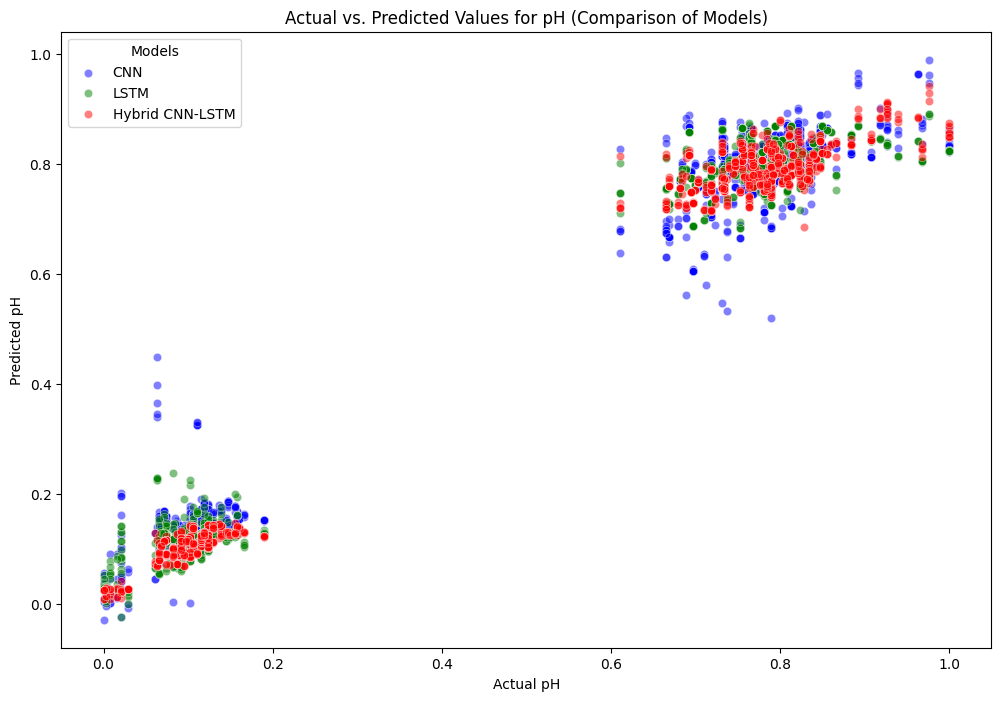


Model Performance Comparison:
CNN Model - MAE: 0.0479, RMSE: 0.0633
LSTM Model - MAE: 0.0408, RMSE: 0.0543
Hybrid CNN-LSTM Model - MAE: 0.0306, RMSE: 0.0413


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from each model
pH_pred_cnn = cnn_model.predict(X_test)
pH_pred_lstm = lstm_model.predict(X_test)
pH_pred_hybrid = cnn_lstm_model.predict(X_test)

# Create a dataframe for visualization
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'CNN Predicted': pH_pred_cnn.flatten(),
    'LSTM Predicted': pH_pred_lstm.flatten(),
    'Hybrid Predicted': pH_pred_hybrid.flatten()
})

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot Actual vs Predicted values for each model
sns.scatterplot(x=comparison_df['Actual'], y=comparison_df['CNN Predicted'], label='CNN', color='blue', alpha=0.5)
sns.scatterplot(x=comparison_df['Actual'], y=comparison_df['LSTM Predicted'], label='LSTM', color='green', alpha=0.5)
sns.scatterplot(x=comparison_df['Actual'], y=comparison_df['Hybrid Predicted'], label='Hybrid CNN-LSTM', color='red', alpha=0.5)

# Labels and title
plt.title('Actual vs. Predicted Values for pH (Comparison of Models)')
plt.xlabel('Actual pH')
plt.ylabel('Predicted pH')
plt.legend(title="Models")
plt.show()

# Displaying the results in a readable format
print("\nModel Performance Comparison:")
print(f"CNN Model - MAE: {cnn_mae:.4f}, RMSE: {cnn_rmse:.4f}")
print(f"LSTM Model - MAE: {lstm_mae:.4f}, RMSE: {lstm_rmse:.4f}")
print(f"Hybrid CNN-LSTM Model - MAE: {cnn_lstm_mae:.4f}, RMSE: {cnn_lstm_rmse:.4f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


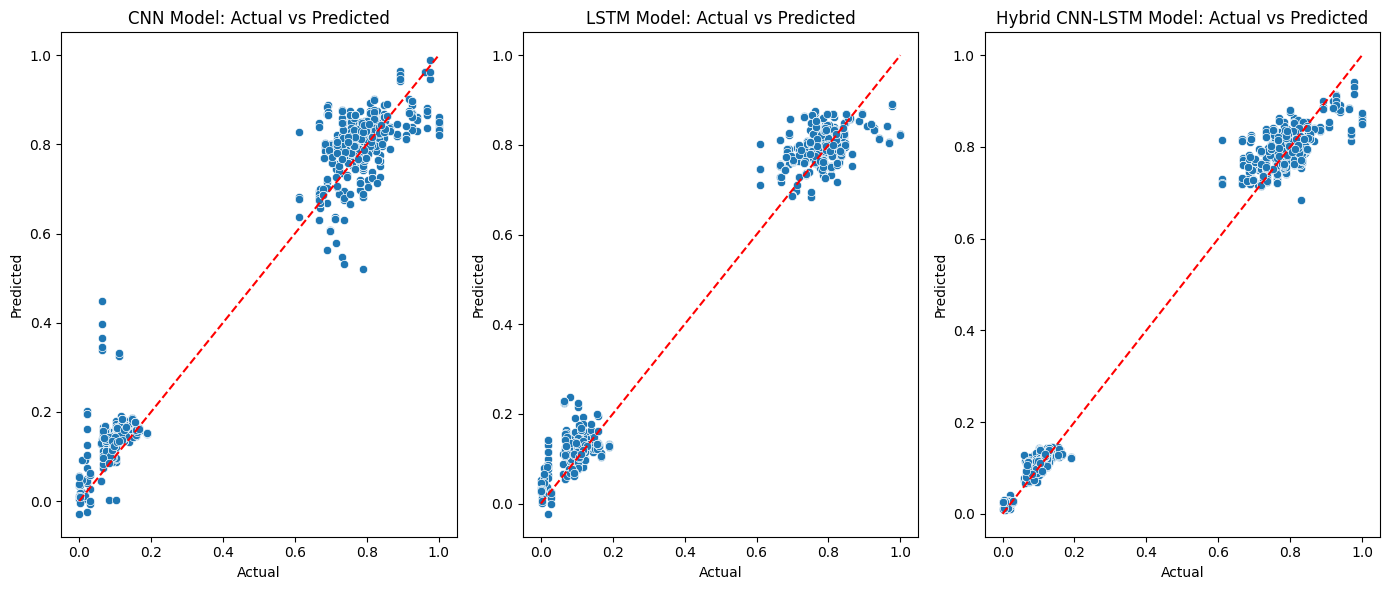

In [ ]:
import seaborn as sns

# Create a DataFrame for actual vs predicted values
df_actual_pred = pd.DataFrame({
    'Actual': y_test,
    'CNN Predicted': cnn_model.predict(X_test).flatten(),
    'LSTM Predicted': lstm_model.predict(X_test).flatten(),
    'Hybrid Predicted': cnn_lstm_model.predict(X_test).flatten()
})

# Plot Actual vs Predicted for each model
plt.figure(figsize=(14, 6))

# CNN Model
plt.subplot(1, 3, 1)
sns.scatterplot(x='Actual', y='CNN Predicted', data=df_actual_pred)
plt.plot([df_actual_pred['Actual'].min(), df_actual_pred['Actual'].max()],
         [df_actual_pred['Actual'].min(), df_actual_pred['Actual'].max()], '--', color='red')
plt.title('CNN Model: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# LSTM Model
plt.subplot(1, 3, 2)
sns.scatterplot(x='Actual', y='LSTM Predicted', data=df_actual_pred)
plt.plot([df_actual_pred['Actual'].min(), df_actual_pred['Actual'].max()],
         [df_actual_pred['Actual'].min(), df_actual_pred['Actual'].max()], '--', color='red')
plt.title('LSTM Model: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Hybrid CNN-LSTM Model
plt.subplot(1, 3, 3)
sns.scatterplot(x='Actual', y='Hybrid Predicted', data=df_actual_pred)
plt.plot([df_actual_pred['Actual'].min(), df_actual_pred['Actual'].max()],
         [df_actual_pred['Actual'].min(), df_actual_pred['Actual'].max()], '--', color='red')
plt.title('Hybrid CNN-LSTM Model: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

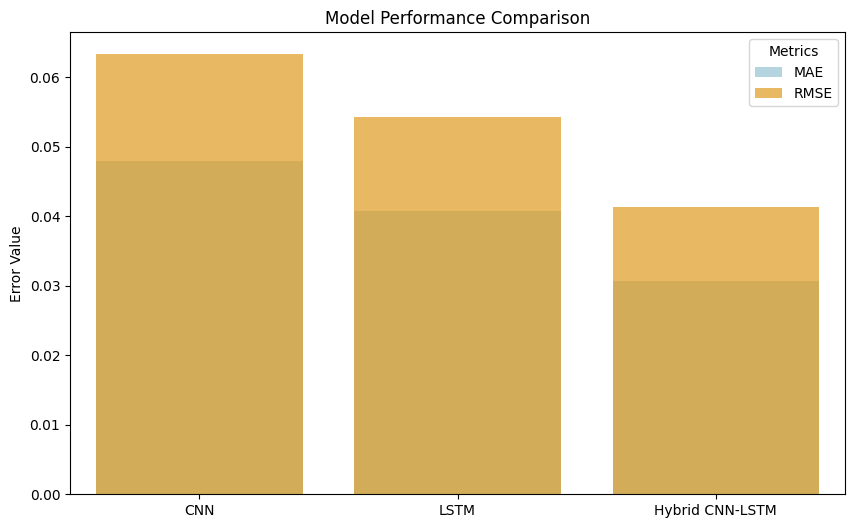

In [ ]:
# Plot MAE and RMSE for each model
models = ['CNN', 'LSTM', 'Hybrid CNN-LSTM']
mae_values = [cnn_mae, lstm_mae, cnn_lstm_mae]
rmse_values = [cnn_rmse, lstm_rmse, cnn_lstm_rmse]

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for MAE
sns.barplot(x=models, y=mae_values, color='lightblue', label='MAE')
sns.barplot(x=models, y=rmse_values, color='orange', label='RMSE', alpha=0.7)

plt.title('Model Performance Comparison')
plt.ylabel('Error Value')
plt.legend(title='Metrics')
plt.show()

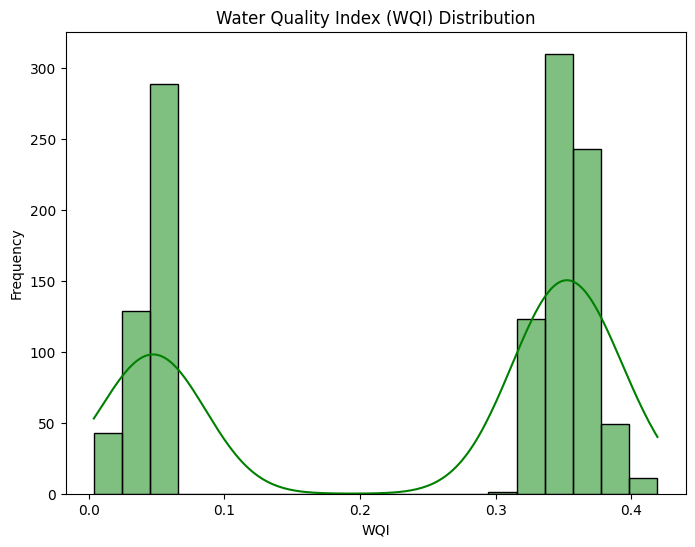

In [ ]:
# For demonstration, assume we have multiple water quality parameters (e.g., pH, Dissolved Oxygen)
# and their predicted values from the models.
df_wqi = pd.DataFrame({
    'pH': df_actual_pred['Hybrid Predicted'],  # You can replace with multiple parameters if needed
    'Dissolved Oxygen': df_actual_pred['Hybrid Predicted'] * 0.5,  # Placeholder
    'Temperature': df_actual_pred['Hybrid Predicted'] * 0.2,  # Placeholder
    'Nitrate': df_actual_pred['Hybrid Predicted'] * 0.1,  # Placeholder
    'Ammonia': df_actual_pred['Hybrid Predicted'] * 0.05  # Placeholder
})

# Compute WQI (using a simple weighted sum as an example)
weights = {
    'pH': 0.25,
    'Dissolved Oxygen': 0.3,
    'Temperature': 0.1,
    'Nitrate': 0.15,
    'Ammonia': 0.2
}

df_wqi['WQI'] = (df_wqi['pH'] * weights['pH'] +
                 df_wqi['Dissolved Oxygen'] * weights['Dissolved Oxygen'] +
                 df_wqi['Temperature'] * weights['Temperature'] +
                 df_wqi['Nitrate'] * weights['Nitrate'] +
                 df_wqi['Ammonia'] * weights['Ammonia'])

# Visualize WQI distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_wqi['WQI'], kde=True, color='green', bins=20)
plt.title('Water Quality Index (WQI) Distribution')
plt.xlabel('WQI')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# This should be installed locally.

pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
# This part needs to be opened using Streamlit.

import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Streamlit dashboard
st.title('Water Quality Prediction Dashboard')

# Display input features
st.sidebar.header('Input Parameters')
Temperature = st.sidebar.slider('Temperature (°C)', min_value=0, max_value=40, value=25)
Surface_Temperature = st.sidebar.slider('Surface Temperature', min_value=0, max_value=40, value=25)
Ammonia = st.sidebar.slider('Ammonia', min_value=0, max_value=10, value=2)
Nitrate = st.sidebar.slider('Nitrate', min_value=0, max_value=10, value=3)
Phosphate = st.sidebar.slider('Phosphate', min_value=0, max_value=10, value=4)
Acidity = st.sidebar.slider('Acidity', min_value=0, max_value=10, value=7)
Seismicity = st.sidebar.slider('Seismicity', min_value=0, max_value=10, value=1)

input_data = pd.DataFrame([[Temperature, Surface_Temperature, Ammonia, Nitrate, Phosphate, Acidity, Seismicity]],
                          columns=['Temperature (in Celsius)', 'Surface Temperature', 'Ammonia', 'Nitrate',
                                   'Phosphate', 'Acidity', 'Seismicity'])

# Normalize the input data
scaler = MinMaxScaler()
input_scaled = scaler.fit_transform(input_data)

# Predict the water quality (e.g., pH) using the hybrid model
predicted_pH = cnn_lstm_model.predict(input_scaled)

st.write(f"Predicted pH: {predicted_pH[0][0]:.2f}")

# Visualize Actual vs Predicted values
df_actual_pred = pd.DataFrame({'Actual': y_test, 'Predicted': cnn_lstm_model.predict(X_test).flatten()})
st.subheader('Actual vs Predicted values for Hybrid CNN-LSTM')
sns.scatterplot(x='Actual', y='Predicted', data=df_actual_pred)
plt.plot([df_actual_pred['Actual'].min(), df_actual_pred['Actual'].max()],
         [df_actual_pred['Actual'].min(), df_actual_pred['Actual'].max()], '--', color='red')
st.pyplot()


2025-05-04 02:45:19.574 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 02:45:19.744 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-04 02:45:19.745 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 02:45:19.747 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 02:45:19.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 02:45:19.751 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 02:45:19.752 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 02:45:19.754 Thread 'MainThread': mi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


2025-05-04 02:45:19.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 02:45:19.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


2025-05-04 02:45:20.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 02:45:20.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 02:45:20.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 02:45:20.264 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 02:45:20.265 
Calling `st.pyplot()` without providing a figure argument has been deprecated
and will be removed in a later version as it requires the use of Matplotlib's
global figure object, which is not thread-safe.

To future-proof this code, you should pass in a figure as shown below:

```python
fig, ax = plt.subplots()
ax.scatter([1, 2, 3], [1, 2, 3])
# other plotting actions...
st.pyplot(fig)
```

If you have a specific use case that requires this functionality, please let u

DeltaGenerator()

<Figure size 640x480 with 0 Axes>